### CIS 9 - Lab 4: NLP

In [225]:
# Name: Aryan Singhal

Use NLTK to train a model that analyzes movie reviews to determine if a review says that a movie is good or bad.<br>
The input file has reviews from the website Rotten Tomatoes and is named _rottentomatoes.csv_ ([source](https://www.kaggle.com/code/amilsilahic/rotten-tomatoes-sentiment/data?select=data_rt.csv)).<br>

In [11]:
# import files
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

1. __Read data from the file _rottentomatoes.csv_ into a DataFrame__.<br>
Then __print the number of rows and columns of the DataFrame__,<br>
and __print the DataFrame__.

In the file, the label 1 means it's a good movie, and the label 0 means it's a bad movie.

In [2]:
df = pd.read_csv('rottentomatoes.csv')
print(df.shape)
df.head()


(10662, 2)


,reviews,labels
0,"simplistic , silly and tedious .",0
1,"it's so laddish and juvenile , only teenage bo...",0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0


2.  __Check to see if there are NaN__ and __drop the rows with NaN__ if needed.

In [3]:
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.shape)

reviews    0
labels     0
dtype: int64
(10662, 2)


3. __Check if the labels are balanced data__.<br>
Then __create a Raw NBConvert cell to indicate whether the data is balanced__.

In [5]:
label_counts = df['labels'].value_counts()
print(label_counts)

labels
0    5331
1    5331
Name: count, dtype: int64


4. __Print the row index of good movies and the row index of bad movies__.<br>
Then __create a Raw NBConvert cell to explain where the good movies and bad movies are in the DataFrame__.<br>
Example of explanation: good movies are in row index 0 - 3000 and 5000-8000

In [6]:
good_movies_indices = df[df['labels'] == 1].index
bad_movies_indices = df[df['labels'] == 0].index

print("Good Movies Indices: ", good_movies_indices)
print("Bad Movies Indices: ", bad_movies_indices)

Good Movies Indices:  Index([ 5331,  5332,  5333,  5334,  5335,  5336,  5337,  5338,  5339,  5340,
       ...
       10652, 10653, 10654, 10655, 10656, 10657, 10658, 10659, 10660, 10661],
      dtype='int64', length=5331)
Bad Movies Indices:  Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5321, 5322, 5323, 5324, 5325, 5326, 5327, 5328, 5329, 5330],
      dtype='int64', length=5331)


5. __Create the X and y datasets__.<br>
Then __print the number of rows and columns of X and y__.

In [8]:
X = df['reviews']
y = df['labels']
print(X.shape)
print(y.shape)

(10662,)
(10662,)


6. __Preprocess the X dataset to remove stop words and stem the words__,<br>
then __print the first 5 rows of the resulting processed X dataset__

In [10]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer() # instantiate the stemmer

def preprocess(text):
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

X_processed = X.apply(preprocess)

print(X_processed.head())

[nltk_data] Downloading package punkt to /Users/aryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/aryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                simplist silli tediou
1    laddish juvenil teenag boy could possibl find ...
2    exploit larg devoid depth sophist would make w...
3    garbu discard potenti patholog studi exhum ins...
4    visual flashi narr opaqu emot vapid exercis st...
Name: reviews, dtype: object


7a. Now that the stop words are removed, let's see what the top 10 words for the good and bad movies are.<br>
__Show the top 10 most used words__ and __plot their frequencies__ in reviews for good movies.<br>
Hint: the result of step 4 can help you select the reviews for good movies

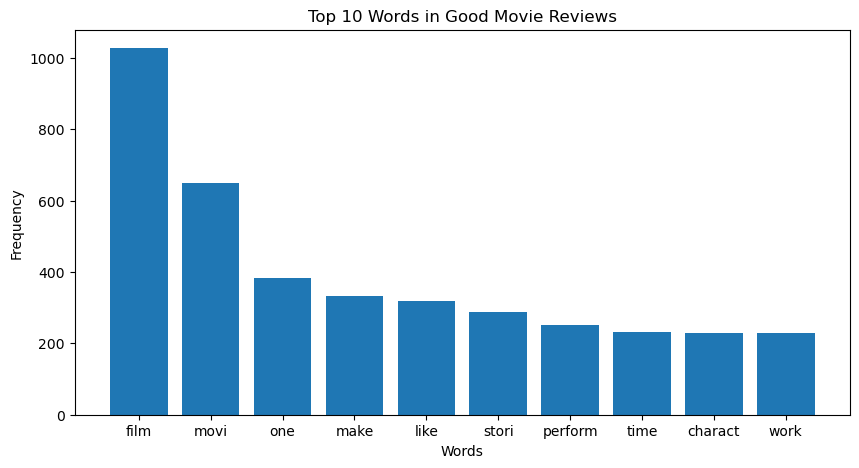

In [13]:
good_reviews = X_processed[df['labels'] == 1]
all_words = ' '.join(good_reviews).split()
word_freq = Counter(all_words)

most_common_good = word_freq.most_common(10)
words, counts = zip(*most_common_good)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Words in Good Movie Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

7b. __Show the top 10 most used words__ and __plot their frequencies__ in reviews for bad movies.<br>
Hint: the result of step 4 can help you select the reviews for bad movies

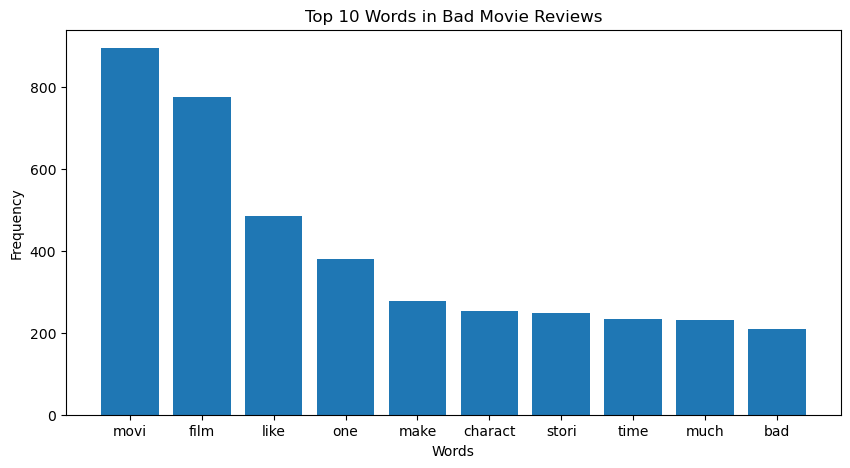

In [14]:
bad_reviews = X_processed[df['labels'] == 0]
all_words = ' '.join(bad_reviews).split()
word_freq = Counter(all_words)

most_common_bad = word_freq.most_common(10)
words, counts = zip(*most_common_bad)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Words in Bad Movie Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

7c. __Create a Raw NBConvert cell__ to explain whether the top 10 words in a review are a good indication of good vs bad movies.

8. __Convert the preprocessed X dataset to vectors of numbers__.<br>
Then __print the shape of the X vectors__

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_vectors = vectorizer.fit_transform(X_processed)

# shape of the X vectors
print(X_vectors.shape)

(10662, 12104)


9. __Divide the X vectors and y datasets into training and testing set__.<br>
Then __print the shape of each set__.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

# Shape of each set
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (8529, 12104)
X_test shape:  (2133, 12104)
y_train shape:  (8529,)
y_test shape:  (2133,)


10. __Train the MultinomialNB model with the training data__<br>
Then __test it with the testing data__ and __show the accuracy__ of the model.<br>

_Don't forget that the accuracy is both the accuracy score and the confusion matrix_.

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize model
nb_model = MultinomialNB()

# Train & test the model
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)

Accuracy:  0.7543366150961087
Confusion Matrix: 
 [[805 257]
 [267 804]]


11a. In step 7 you removed the stop words and stem the words as part of preprocessing the X dataset.<br>

In this step, create one or more Code cells to fine tune the preprocessing step by doing the following:
- __Try a different tokenizer__ (but use only the ones we've discussed in class)<br>
__Determine whether you should keep or remove the stop words__<br>
__Determine whether you should stem the words or not__.
- __Train and test the model until you find the processing step that gives the highest accuracy__.<br>
You should be trying different combinations discussed in the bullet point above.

Then __create a Raw NBConvert cell__, and for <u>each</u> preprocessing step that you tried above, show:
- __what is in the preprocessing step__ (which tokenizer, stop words or not, stemming or not)
- __the accuracy of the step__ (copy the accuracy output to the Raw NBConvert cell)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# different combinations of tokenizers, stop word removal, and stemming
def preprocess_text(text, remove_stopwords=True, apply_stemming=True, tokenizer='word'):
    if tokenizer == 'word':
        words = word_tokenize(text)
    elif tokenizer == 'treebank':
        words = nltk.TreebankWordTokenizer().tokenize(text)
    
    if remove_stopwords:
        words = [word for word in words if word.isalpha() and word not in stop_words]
    else:
        words = [word for word in words if word.isalpha()]
    
    if apply_stemming:
        words = [ps.stem(word) for word in words]
    
    return ' '.join(words)

In [19]:
# different combinations to try
combinations = [
    {'remove_stopwords': True, 'apply_stemming': True, 'tokenizer': 'word'},
    {'remove_stopwords': True, 'apply_stemming': False, 'tokenizer': 'word'},
    {'remove_stopwords': False, 'apply_stemming': True, 'tokenizer': 'word'},
    {'remove_stopwords': False, 'apply_stemming': False, 'tokenizer': 'word'},
    {'remove_stopwords': True, 'apply_stemming': True, 'tokenizer': 'treebank'},
    {'remove_stopwords': True, 'apply_stemming': False, 'tokenizer': 'treebank'},
    {'remove_stopwords': False, 'apply_stemming': True, 'tokenizer': 'treebank'},
    {'remove_stopwords': False, 'apply_stemming': False, 'tokenizer': 'treebank'},
]

In [20]:
best_accuracy = 0
best_combination = None

In [21]:
for combo in combinations:
    X_processed = X.apply(lambda x: preprocess_text(x, **combo))
    vectorizer = CountVectorizer()
    X_vectors = vectorizer.fit_transform(X_processed)
    X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)
    
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Combination: {combo}, Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_combination = combo

Combination: {'remove_stopwords': True, 'apply_stemming': True, 'tokenizer': 'word'}, Accuracy: 0.7543366150961087
Combination: {'remove_stopwords': True, 'apply_stemming': False, 'tokenizer': 'word'}, Accuracy: 0.7548054383497421
Combination: {'remove_stopwords': False, 'apply_stemming': True, 'tokenizer': 'word'}, Accuracy: 0.759493670886076
Combination: {'remove_stopwords': False, 'apply_stemming': False, 'tokenizer': 'word'}, Accuracy: 0.7576183778715424
Combination: {'remove_stopwords': True, 'apply_stemming': True, 'tokenizer': 'treebank'}, Accuracy: 0.7543366150961087
Combination: {'remove_stopwords': True, 'apply_stemming': False, 'tokenizer': 'treebank'}, Accuracy: 0.7548054383497421
Combination: {'remove_stopwords': False, 'apply_stemming': True, 'tokenizer': 'treebank'}, Accuracy: 0.759493670886076
Combination: {'remove_stopwords': False, 'apply_stemming': False, 'tokenizer': 'treebank'}, Accuracy: 0.7576183778715424


11b. __Create a Raw NBConvert cell to explain what preprocessing step is best__.

12. Using the best preprocessing step that you determined from step 11b,  __train and test the model__ one last time.<br>
Then __show the accuracy__.<br>
This will be your best tuned model.

In [22]:
best_combo = {'remove_stopwords': False, 'apply_stemming': True, 'tokenizer': 'word'}
X_processed = X.apply(lambda x: preprocess_text(x, **best_combo))
vectorizer = CountVectorizer()
X_vectors = vectorizer.fit_transform(X_processed)
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Tuned Model Accuracy: ", accuracy)
print("Best Tuned Model Confusion Matrix: \n", conf_matrix)

Best Tuned Model Accuracy:  0.759493670886076
Best Tuned Model Confusion Matrix: 
 [[825 237]
 [276 795]]


---

13. Now we test your best tuned model with a completely new dataset.<br>

__Read the file _movies.csv_ in to a DataFrame__. _movies.csv_ has movie reviews from the website IMDb ([source](https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis))<br>
Then __print the number of rows and columns of the DataFrame__ and __print the first 5 rows__ to inspect the data.<br>
In the dataset, a label of 0 means bad movie, and a label of 1 means good movie.

In [23]:
movies_df = pd.read_csv('movies.csv')

print(movies_df.shape)

print(movies_df.head())

(40000, 2)
                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


14. Skipping the steps to check for NaNs (they've been checked for you):<br>
__Create the X and y datasets__ and __print the number of rows and columns__ of each set

In [26]:
X_movies = movies_df['text']
y_movies = movies_df['label']

print(X_movies.shape)
print(y_movies.shape)

(40000,)
(40000,)


15. __Preprocess the X dataset__ <u>in the same way</u> that you preprocessed the X data from Rotten Tomatoes above.<br>
Then __print the first 5 rows of the processed X dataset__<br>
Take advantage of code re-use, now is not the time to blindly copy-and-paste.

In [27]:
X_movies_processed = X_movies.apply(lambda x: preprocess_text(x, **best_combo))

print(X_movies_processed.head())

0    i grew up b watch and love the thunderbird all...
1    when i put thi movi in my dvd player and sat d...
2    whi do peopl who do not know what a particular...
3    even though i have great interest in biblic mo...
4    im a die hard dad armi fan and noth will ever ...
Name: text, dtype: object


16. __Convert the processed X strings into vectors__ <u>in the same way</u> as you did for the Rotten Tomatoes reviews.<br>
Then __print the shape of the X vectors__<br>
Take advantage of code re-use, now is definitely not the time to blindly copy-and-paste.<br>

_Note: If you copy-and-paste everything from the previous dataset above, it's guaranteed not to work. You need to understand what goes on above to know what can be re-uses. Yes, it's the last lab and I'm showing my evil self_.

In [28]:
X_movies_vectors = vectorizer.transform(X_movies_processed)

print(X_movies_vectors.shape)

(40000, 12202)


17. __Test the NLP model that you've trained above with the new X vectors__<br>
Then __print the accuracy and confusion matrix__

In [29]:
y_movies_pred = nb_model.predict(X_movies_vectors)

accuracy_movies = accuracy_score(y_movies, y_movies_pred)
conf_matrix_movies = confusion_matrix(y_movies, y_movies_pred)

print("New Dataset Accuracy: ", accuracy_movies)
print("New Dataset Confusion Matrix: \n", conf_matrix_movies)

New Dataset Accuracy:  0.684975
New Dataset Confusion Matrix: 
 [[19323   696]
 [11905  8076]]
